## **Integrantes:**
- Juan Bojato
- Jesus Santiago
- Jefferson Sierra

## **Instrucciones**



Ejecutar todas las celdas (CTRL+F9) y observar los resultados al final de cada punto.

## **Librerias**

In [ ]:
!pip install scikit-opt
!pip install gaft

## **Imports**

In [ ]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from sko.GA import GA_TSP
from gaft import GAEngine
from gaft.components import BinaryIndividual
from gaft.components import Population
from gaft.operators import TournamentSelection
from gaft.operators import UniformCrossover
from gaft.operators import FlipBitMutation
from gaft.plugin_interfaces.analysis import OnTheFlyAnalysis
from gaft.analysis.fitness_store import FitnessStore

----
## **Punto mas alejado del origen de una función**


- Rango de valores y espaciado entre valores para la función:

In [ ]:
# start = -0.5
# end = 1
start = 0
end = 1
step = 0.001

- Función a evaluar, para incluir funciones como _seno_, _coseno_, _exponencial_, etc se deben usar las funciones de la librería numpy.:

In [ ]:
def evaluateFunction(x):
  fr1 = 1.8
  fr2 = 100
  fa1 = 0.8*np.pi
  k = 0.8
  y = (np.sin(x*fr1*np.pi-fa1)+0.25*np.sin(x*fr2*np.pi))*np.exp(-k*x)
  return y
  
  

- Definición de la población:

In [ ]:
indv_template = BinaryIndividual(ranges=[(start, end)], eps=0.001)
poblacion = Population(indv_template=indv_template, size=100).init()

- Operadores genéticos e instanciación del motor del algoritmo genético

In [ ]:
seleccion = TournamentSelection()
cruce = UniformCrossover(pc=0.8, pe=0.5)  
mutacion = FlipBitMutation(pm=0.3)

engine = GAEngine(population=poblacion, selection=seleccion,
                  crossover=cruce, mutation=mutacion,
                  analysis=[FitnessStore])

- Definición de función 'Fitness':

In [ ]:
@engine.fitness_register
def fitness(indv):
    x, = indv.solution
    return np.float(np.abs(evaluateFunction(x)))

- Definición de análisis durante la ejecución y gráfica de la función en el intervalo previamente especificado:

Generación: 0, Mejor valor Fitness: -1.0973155260
Generación: 10, Mejor valor Fitness: -1.1070679341
Generación: 20, Mejor valor Fitness: -1.1070679341
Generación: 30, Mejor valor Fitness: -1.1070679341
Generación: 40, Mejor valor Fitness: -1.1070679341
Generación: 50, Mejor valor Fitness: -1.1070679341
Generación: 60, Mejor valor Fitness: -1.1070679341
Generación: 70, Mejor valor Fitness: -1.1070679341
Generación: 80, Mejor valor Fitness: -1.1070679341
Generación: 90, Mejor valor Fitness: -1.1070679341
Generación: 100, Mejor valor Fitness: -1.1070679341
gaft.FitnessStore   INFO     Best fitness values are written to best_fit.py
Solución óptima: (0.1347656250, -1.1070679341)


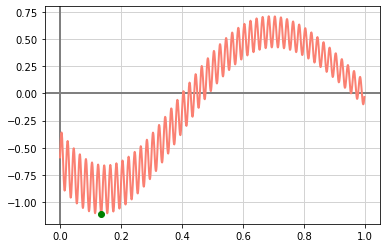

In [ ]:
@engine.analysis_register
class ConsoleOutputAnalysis(OnTheFlyAnalysis):
    interval = 1
    master_only = True
 
    def register_step(self, g, population, engine):
        best_indv = population.best_indv(engine.fitness)
        if(g%10 == 0):
          print('Generación: {}, Mejor valor Fitness: {:.10f}'.format(g,evaluateFunction(best_indv.solution[0])))#engine.ori_fmax))
 
    def finalize(self, population, engine):
        best_indv = population.best_indv(engine.fitness)
        x = best_indv.solution
        #y = engine.ori_fmax
        print('Solución óptima: ({:.10f}, {:.10f})'.format(x[0], evaluateFunction(x[0])))# y)
        #print(msg)
 
        # Gráfica:
        fig, graph = plt.subplots()
 
        values = np.arange(start, end, step)
 
        plt.axhline(0, color='gray', lw=2)
        plt.axvline(0, color='gray', lw=2)
        line = graph.plot(values, evaluateFunction(values), lw = 2, color = 'salmon')
        
        
        graph.plot(x[0],evaluateFunction(x[0]), 'og')
        plt.grid(color='lightgray', linestyle='-', linewidth='1')
        plt.show()
 
if '__main__' == __name__:
    # Run the GA engine.
    engine.run(ng=101)

----
# **Solución al Problema del Agente Viajero TSP**


## **Valores iniciales**

Se define la cantidad de puntos deseada, donde cada punto posee una coordenada X,Y que representa su posición dentro del cuadrado. Dichas coordenadas poseen valores menores que 1 ( Si se quiere trabajar con valores enteros, se debe descomentar el comentario en la sección de abajo).

Por ejemplo P(0.35,0.43).

La función **distancia_euclidiana** calcula todas las distancias euclidianas entre cada punto posible.

In [ ]:
numero_puntos = 12

puntos = np.random.rand(numero_puntos, 2)  # Se originan las coordenadas de los puntos
#points_coordinate = np.random.randint(100, size=(num_points, 2))

distancia_euclidiana = spatial.distance.cdist(puntos, puntos, metric='euclidean')
print(distancia_euclidiana)

[[0.         0.36945954 0.38152562 0.52358671 0.74705419 0.46850852
  0.13885285 0.14546999 0.18674509 0.69714291 0.72071349 0.25455451]
 [0.36945954 0.         0.71142684 0.34781361 0.744623   0.69471253
  0.45834162 0.22451353 0.44961306 0.73237224 1.03306212 0.61785957]
 [0.38152562 0.71142684 0.         0.90453158 1.07390613 0.68048284
  0.2563586  0.50912241 0.48936047 1.01022555 0.73446409 0.17027043]
 [0.52358671 0.34781361 0.90453158 0.         0.42656735 0.57036308
  0.65788938 0.41812281 0.46401287 0.43776207 0.95507002 0.7617546 ]
 [0.74705419 0.744623   1.07390613 0.42656735 0.         0.46089931
  0.8806269  0.71435636 0.58794742 0.08112459 0.79181777 0.90515876]
 [0.46850852 0.69471253 0.68048284 0.57036308 0.46089931 0.
  0.56244304 0.53106065 0.28520692 0.38216846 0.3858599  0.51306798]
 [0.13885285 0.45834162 0.2563586  0.65788938 0.8806269  0.56244304
  0.         0.253059   0.30154129 0.82727076 0.7515242  0.17681551]
 [0.14546999 0.22451353 0.50912241 0.41812281 0.7

### **Calcular distancia entre nodos**

Con la función **ca_total_distance** perteneciente a la libreria *sko.GA*, se calcula la distancia más corta posible para recorrer todos los puntos.

In [ ]:

def cal_total_distance(routine):
    num_points, = routine.shape
    return sum([distancia_euclidiana[routine[i % numero_puntos], routine[(i + 1) % numero_puntos]] for i in range(numero_puntos)])

### **Método principal**

Contiene la función GA_TSP que representa la solución del problema del agente viajero mediante algoritmos geneticos. A su vez dicha función nos otorga el camino más corto posible en que se pueden recorrer todos los puntos y la distancia de este camino.

Por otra parte, sus parametros son:

- **n_dim**: Numero de dimensiones, que en este caso equivale a la cantidad de puntos.
-**size_pop**: Equivale a la población a evaluar.
-**max_iter**: Número de iteracciones
-**prob_mut**: Corresponde a la probabilidad de mutación 0 <= x <= 1

In [ ]:
ga_tsp = GA_TSP(func=cal_total_distance, n_dim=numero_puntos, size_pop=20, max_iter=500, prob_mut=1)
camino, distancia_total = ga_tsp.run()

### **Resultados**

In [ ]:
camino_ = np.concatenate([camino, [camino[0]]])
coordenadas = puntos[camino_, :]
print("Número de puntos iniciales: ",numero_puntos)
print("Punto de inicio:",coordenadas[0])
print("El camino encontrado es el siguiente:")

for i in range(len(coordenadas)):
    if i==len(coordenadas)-1:
      print(coordenadas[i],end="")
    else:
      print(coordenadas[i]," -> ",end="" )
        
print("")
print("La distancia total del camino encontrado es: ",distancia_total)


Número de puntos iniciales:  12
Punto de inicio: [0.48567737 0.49581511]
El camino encontrado es el siguiente:
[0.48567737 0.49581511]  -> [0.46705177 0.31000118]  -> [0.35981167 0.22179873]  -> [0.10577805 0.18735088]  -> [0.21268875 0.31987304]  -> [0.08567471 0.92153979]  -> [0.44381573 0.77793315]  -> [0.79689601 0.92417625]  -> [0.87739012 0.93427067]  -> [0.94934097 0.51381523]  -> [0.81718914 0.19208521]  -> [0.60768089 0.27278602]  -> [0.48567737 0.49581511]
La distancia total del camino encontrado es:  [3.46941967]


## **Graficos**

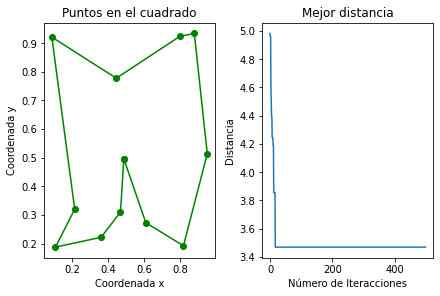

In [ ]:
fig, ax = plt.subplots(1,2,constrained_layout=True)
ax[0].set_title('Puntos en el cuadrado')
ax[0].set_xlabel('Coordenada x')
ax[0].set_ylabel('Coordenada y')
ax[0].plot(coordenadas[:, 0], coordenadas[:, 1], 'o-g')
print("")
ax[1].set_title('Mejor distancia')
ax[1].set_xlabel('Número de Iteracciones')
ax[1].set_ylabel('Distancia')
ax[1].plot(ga_tsp.generation_best_Y)
plt.show()

## **Referencias**

[1] https://pypi.org/project/geneticalgorithm/

[2] https://pypi.org/project/scikit-opt/

[3] https://pypi.org/project/gaft/

[4] 